In [1]:
import numpy as np
import scipy
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import kernel_pca as kpca # python file of own implementation of kernel PCA
from sklearn.metrics import mean_squared_error

# Own implementation

Text(0.5, 1.0, 'data')

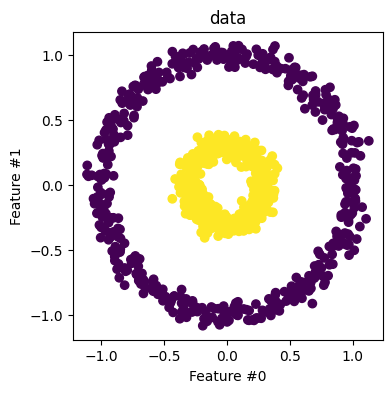

In [2]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
_, ax = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(4, 4))

ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_ylabel("Feature #1")
ax.set_xlabel("Feature #0")
ax.set_title("data")

In [3]:
X_kernel_pca, eigenvectors, eigenvalues = kpca.kernel_PCA(X, X, n_components=None, kernel='rbf', gamma=10, mode='transform')

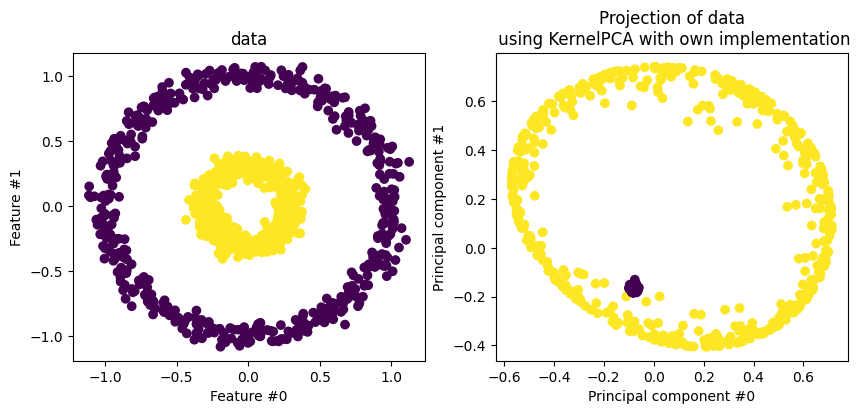

In [4]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X[:, 0], X[:, 1], c=y)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("data")

kernel_pca_proj_ax.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA with own implementation")

# Compare to the results taken from sklearn example
https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py

In [5]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, eigen_solver='dense'
)
X_kernel_pca_sklearn = kernel_pca.fit(X).transform(X)

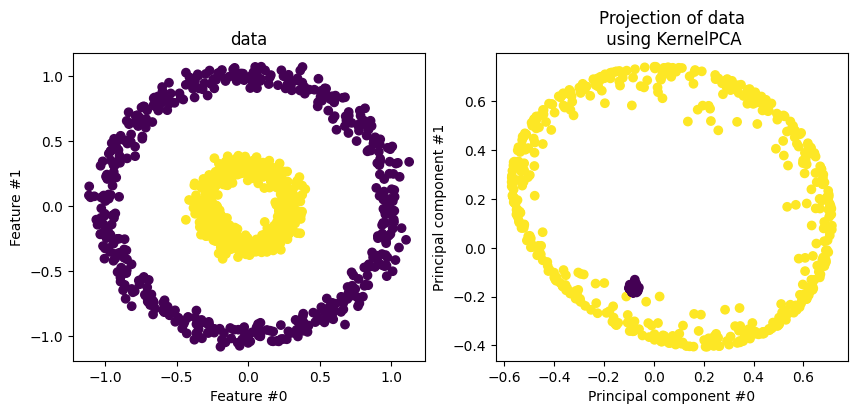

In [6]:
fig, (orig_data_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=2, figsize=(10, 4)
)

orig_data_ax.scatter(X[:, 0], X[:, 1], c=y)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("data")

kernel_pca_proj_ax.scatter(X_kernel_pca_sklearn[:, 0], X_kernel_pca_sklearn[:, 1], c=y)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of data\n using KernelPCA")

# Results reproduced perfectly! :D

In [7]:
print(f"Own implementation\n{eigenvectors}")
print(f"sklearn\n{kernel_pca.eigenvectors_}")

Own implementation
[[ 0.04874267  0.05159269 -0.01251619 ... -0.          0.
  -0.        ]
 [ 0.05024189 -0.02272287  0.04860843 ...  0.00615905  0.00162926
   0.00062835]
 [-0.00814747 -0.01736404 -0.02535501 ...  0.00335556 -0.00096022
  -0.00172684]
 ...
 [-0.03208536  0.05881071  0.02289995 ...  0.02185215 -0.00587783
   0.00156721]
 [ 0.01418666  0.06905899 -0.012249   ...  0.00455318 -0.00428381
  -0.01390451]
 [-0.05492013  0.01817501  0.04563389 ...  0.02463856  0.04000384
  -0.03402352]]
sklearn
[[ 0.04874267  0.05159269 -0.01251619 ...  0.02005458  0.00734378
  -0.00983051]
 [ 0.05024189 -0.02272287  0.04860843 ... -0.01684901  0.03573878
   0.00944137]
 [-0.00814747 -0.01736404 -0.02535501 ...  0.03989109 -0.02427766
   0.04354373]
 ...
 [-0.03208536  0.05881071  0.02289995 ... -0.04893983  0.01411499
   0.00776415]
 [ 0.01418666  0.06905899 -0.012249   ...  0.026998    0.03854865
   0.01949737]
 [-0.05492013  0.01817501  0.04563389 ... -0.01555076 -0.00944156
   0.00096846

## Below is my failed atttempt to reproduce the toy example result in the OG https://alex.smola.org/papers/1999/MikSchSmoMuletal99.pdf, apparently the algorithm for reproducing this result is more complex than I thought. You could take a look at the iterative algorithm in the paper.

In [11]:
N = 10  # Sample space dimension
M = 11  #  Number of Gaussians
S = [100, 33]  #  Samples selected from each source for [training, test]
std_list = [0.05, 0.1, 0.2, 0.4, 0.8]
n_components = 1
for std in std_list:
    c = 2*std**2

    # Pick centers of the M Gaussians
    centers = np.random.uniform(low=-1.0, high=1.0, size=(M, N))  # M x N

    # Construct train_data as a matrix of dimension (S[0]*M) x N, that is S[0] samples for each Gaussian. Each row of the matrix is an N-dimensional sample
    train_data = np.random.multivariate_normal(mean=centers[0], cov=std ** 2 * np.eye(N), size=S[0])
    for i in range(1, M):
        train_data = np.concatenate((train_data, np.random.multivariate_normal(mean=centers[i], cov=std ** 2 * np.eye(N), size=S[0])), axis=0)  
    
    # Construct test_data as a matrix of dimension (S[1]*M) x N, that is S[0] samples for each Gaussian. Each row of the matrix is an N-dimensional sample
    test_data = np.random.multivariate_normal(mean=centers[0], cov=std ** 2 * np.eye(N), size=S[1])
    for i in range(1, M):
        test_data = np.concatenate((test_data, np.random.multivariate_normal(mean=centers[i], cov=std ** 2 * np.eye(N), size=S[1])), axis=0)  


    # kernel_pca = KernelPCA(n_components=n_components, kernel="rbf", gamma=1/(N*c), eigen_solver='dense', fit_inverse_transform=True)
    # kpca_test_transformed = kernel_pca.fit(train_data).transform(test_data)
    # kpca_test_recon = kernel_pca.inverse_transform(kpca_test_transformed)
    # recon_err_kpca = mean_squared_error(test_data, kpca_test_recon)
    recon_err_kpca = kpca.kernel_PCA(train_data, test_data, n_components, 'rbf', 1/(N*c), c, 'recon')
    print(f'Kernel PCA: sigma = {std}, err = {recon_err_kpca}')

    pca = PCA(n_components)
    pca_transformed_test = pca.fit(train_data).transform(test_data)
    pca_recon_test = pca.inverse_transform(pca_transformed_test)
    recon_err_pca = mean_squared_error(test_data, pca_recon_test)
    print(f'Linear PCA: err = {recon_err_pca}')
    


Kernel PCA: sigma = 0.05, err = 0.2765947614816909
Linear PCA: err = 0.20882625469945898
Kernel PCA: sigma = 0.1, err = 0.2690848635155699
Linear PCA: err = 0.2111963688495627
Kernel PCA: sigma = 0.2, err = 0.2690500945645805
Linear PCA: err = 0.23230226623598232
Kernel PCA: sigma = 0.4, err = 0.38969142625869246
Linear PCA: err = 0.3847798669209532
Kernel PCA: sigma = 0.8, err = 0.8025373268840932
Linear PCA: err = 0.801101083105241
